## Importar librerías

In [49]:
import sys
print(sys.executable)

c:\Users\veraa\Documents\python\penguin-prediction\venv\Scripts\python.exe


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
import session_info

# Preprocesamiento de Data
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Modelo
from sklearn.linear_model import LogisticRegression

# Métricas
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    accuracy_score, classification_report, confusion_matrix,
    roc_curve, roc_auc_score, ConfusionMatrixDisplay
)


## Seteando apariencias gráficos

In [2]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

penguin_color = {
    'Adelie': '#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
}

In [3]:
df = pd.read_csv('./penguins_raw.csv')
df

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,120,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A2,No,12/1/09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,PAL0910,121,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A1,Yes,11/22/09,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832,NaN
341,PAL0910,122,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A2,Yes,11/22/09,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117,NaN
342,PAL0910,123,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N43A1,Yes,11/22/09,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969,NaN


## ETL

Para este análisis dejaré las columnas de Species, Sex, BodyMass, Island y transformaré las de los picos a bill. Todo bajo la misma convnención: snake_case

In [4]:
df.columns

Index(['studyName', 'Sample Number', 'Species', 'Region', 'Island', 'Stage',
       'Individual ID', 'Clutch Completion', 'Date Egg', 'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex',
       'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Comments'],
      dtype='object')

Sirve para tener un registro de que se elimina, por nombre de columna

In [5]:
df_cleaned_columns = df[[
    #'studyName', 'Sample Number',
     'Species', 
     #'Region', 
     'Island',
     # 'Stage',
       #'Individual ID', 'Clutch Completion', 
       'Date Egg',
        'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex',
       #'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Comments'
       ]]

df_cleaned_columns

,Species,Island,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie Penguin (Pygoscelis adeliae),Torgersen,11/11/07,39.1,18.7,181.0,3750.0,MALE
1,Adelie Penguin (Pygoscelis adeliae),Torgersen,11/11/07,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie Penguin (Pygoscelis adeliae),Torgersen,11/16/07,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie Penguin (Pygoscelis adeliae),Torgersen,11/16/07,NaN,NaN,NaN,NaN,NaN
4,Adelie Penguin (Pygoscelis adeliae),Torgersen,11/16/07,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...,...
339,Gentoo penguin (Pygoscelis papua),Biscoe,12/1/09,NaN,NaN,NaN,NaN,NaN
340,Gentoo penguin (Pygoscelis papua),Biscoe,11/22/09,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo penguin (Pygoscelis papua),Biscoe,11/22/09,50.4,15.7,222.0,5750.0,MALE
342,Gentoo penguin (Pygoscelis papua),Biscoe,11/22/09,45.2,14.8,212.0,5200.0,FEMALE


In [6]:
df_ordered = df_cleaned_columns.rename(columns={'Species': 'species', 'Sex': 'sex', 'Body Mass (g)': 'body_mass_g', 'Island': 'island', 'Culmen Length (mm)': 'bill_length_mm', 'Culmen Depth (mm)': 'bill_depth_mm', 'Flipper Length (mm)': 'flipper_length_mm', 'Date Egg': 'year'})
df_ordered

,species,island,year,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie Penguin (Pygoscelis adeliae),Torgersen,11/11/07,39.1,18.7,181.0,3750.0,MALE
1,Adelie Penguin (Pygoscelis adeliae),Torgersen,11/11/07,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie Penguin (Pygoscelis adeliae),Torgersen,11/16/07,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie Penguin (Pygoscelis adeliae),Torgersen,11/16/07,NaN,NaN,NaN,NaN,NaN
4,Adelie Penguin (Pygoscelis adeliae),Torgersen,11/16/07,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...,...
339,Gentoo penguin (Pygoscelis papua),Biscoe,12/1/09,NaN,NaN,NaN,NaN,NaN
340,Gentoo penguin (Pygoscelis papua),Biscoe,11/22/09,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo penguin (Pygoscelis papua),Biscoe,11/22/09,50.4,15.7,222.0,5750.0,MALE
342,Gentoo penguin (Pygoscelis papua),Biscoe,11/22/09,45.2,14.8,212.0,5200.0,FEMALE


In [7]:
#Tranformando la fecha a año
print(df_ordered['year'])
df_ordered['year'] = pd.to_datetime(df_ordered['year'])
df_ordered['year'] = df_ordered['year'].apply(lambda x: x.year)
df_ordered

0      11/11/07
1      11/11/07
2      11/16/07
3      11/16/07
4      11/16/07
         ...   
339     12/1/09
340    11/22/09
341    11/22/09
342    11/22/09
343    11/22/09
Name: year, Length: 344, dtype: object


C:\Users\veraa\AppData\Local\Temp\ipykernel_11076\4155030805.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_ordered['year'] = pd.to_datetime(df_ordered['year'])


,species,island,year,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie Penguin (Pygoscelis adeliae),Torgersen,2007,39.1,18.7,181.0,3750.0,MALE
1,Adelie Penguin (Pygoscelis adeliae),Torgersen,2007,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie Penguin (Pygoscelis adeliae),Torgersen,2007,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie Penguin (Pygoscelis adeliae),Torgersen,2007,NaN,NaN,NaN,NaN,NaN
4,Adelie Penguin (Pygoscelis adeliae),Torgersen,2007,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...,...
339,Gentoo penguin (Pygoscelis papua),Biscoe,2009,NaN,NaN,NaN,NaN,NaN
340,Gentoo penguin (Pygoscelis papua),Biscoe,2009,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo penguin (Pygoscelis papua),Biscoe,2009,50.4,15.7,222.0,5750.0,MALE
342,Gentoo penguin (Pygoscelis papua),Biscoe,2009,45.2,14.8,212.0,5200.0,FEMALE


Acá obtengo los nombres de las especies, porque quiero solo mantener el nombre y borrar el resto de detalles

In [8]:
df_ordered['species'].unique()

array(['Adelie Penguin (Pygoscelis adeliae)',
       'Chinstrap penguin (Pygoscelis antarctica)',
       'Gentoo penguin (Pygoscelis papua)'], dtype=object)

In [9]:
df_ordered['species'] = df_ordered['species'].apply(lambda x: 'Adelie' if 'Adelie' in x else ('Chinstrap' if 'Chinstrap' in x else ('Gentoo' if 'Gentoo' in x else x)))
df_ordered['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

Entendiendo la base y como están los datos

In [10]:
df_ordered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   year               344 non-null    int64  
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                334 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [11]:
(df_ordered.isna().sum())

species               0
island                0
year                  0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [12]:
df_ordered[df_ordered.isna().any(axis=1)]

,species,island,year,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,2007,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,2007,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,2007,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,2007,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,2007,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,2007,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,2007,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,2008,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,2009,47.3,13.8,216.0,4725.0,NaN
339,Gentoo,Biscoe,2009,NaN,NaN,NaN,NaN,NaN


In [13]:
df_ordered.duplicated().sum()

np.int64(0)

Borrando aquellas filas que tienen por lo menos dos valores nulos.

In [14]:
print(df_ordered.shape)
null_counts = df_ordered.isnull().sum(axis=1)
rows_with_more_than_one_null = null_counts[null_counts >= 2].index
print(rows_with_more_than_one_null)
df_procesada = df_ordered.drop(index=rows_with_more_than_one_null)
print(df_procesada.shape)

(344, 8)
Index([3, 339], dtype='int64')
(342, 8)


Imputación de datos faltantes utilizando la moda (dato más repetido)

In [15]:
imputer = SimpleImputer(strategy='most_frequent')

original_dtypes = df_procesada.dtypes

df_imputada = imputer.fit_transform(df_procesada)

df_procesada = pd.DataFrame(df_imputada, columns=df_procesada.columns)
df_clean = df_procesada.astype(original_dtypes)


In [16]:
(df_clean.isna().sum())

species              0
island               0
year                 0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

## Estadísticas

In [17]:
df_clean.describe(include='all')

,species,island,year,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,342,342,342.000000,342.000000,342.000000,342.000000,342.000000,342
unique,3,3,NaN,NaN,NaN,NaN,NaN,3
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,NaN,MALE
freq,151,167,NaN,NaN,NaN,NaN,NaN,176
mean,NaN,NaN,2008.029240,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,0.817168,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,2007.000000,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,2007.000000,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,2008.000000,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,2009.000000,48.500000,18.700000,213.000000,4750.000000,NaN


El proceso ciertamente es iterativo, acá me doy cuenta que el sex quedó toda en mayúsculas, por fuera de la convención. <br />
En otra iteración después, me doy cuenta que se modifico la base, y hay un valor '.', en el sexo. Es uno solo, así que podemos hacer una imputación con la moda

In [18]:
print(df_clean['sex'].unique())
print(df_clean['sex'].value_counts())

['MALE' 'FEMALE' '.']
sex
MALE      176
FEMALE    165
.           1
Name: count, dtype: int64


In [19]:
df_clean['sex'] = df_clean['sex'].apply(lambda x: 'female' if 'FEMALE' in x else ('male' if 'MALE' in x else x))
df_clean['sex'] = df_clean['sex'].replace('.', None)
df_clean['sex'] = df_clean['sex'].fillna(df_clean['sex'].mode()[0])


In [20]:
df_clean.describe()

,year,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000,342.000000
mean,2008.029240,43.921930,17.151170,200.915205,4201.754386
std,0.817168,5.459584,1.974793,14.061714,801.954536
min,2007.000000,32.100000,13.100000,172.000000,2700.000000
25%,2007.000000,39.225000,15.600000,190.000000,3550.000000
50%,2008.000000,44.450000,17.300000,197.000000,4050.000000
75%,2009.000000,48.500000,18.700000,213.000000,4750.000000
max,2009.000000,59.600000,21.500000,231.000000,6300.000000


In [21]:
df_clean.describe(include=['object'])

,species,island,sex
count,342,342,342
unique,3,3,2
top,Adelie,Biscoe,male
freq,151,167,177


In [22]:
(df_clean.astype({
    'species': 'category',
    'island': 'category',
    'sex': 'category'
})
)

,species,island,year,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,2007,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,2007,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,2007,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,2007,36.7,19.3,193.0,3450.0,female
4,Adelie,Torgersen,2007,39.3,20.6,190.0,3650.0,male
...,...,...,...,...,...,...,...,...
337,Gentoo,Biscoe,2009,47.2,13.7,214.0,4925.0,female
338,Gentoo,Biscoe,2009,46.8,14.3,215.0,4850.0,female
339,Gentoo,Biscoe,2009,50.4,15.7,222.0,5750.0,male
340,Gentoo,Biscoe,2009,45.2,14.8,212.0,5200.0,female


## Visualizando los datos

<Axes: xlabel='species'>

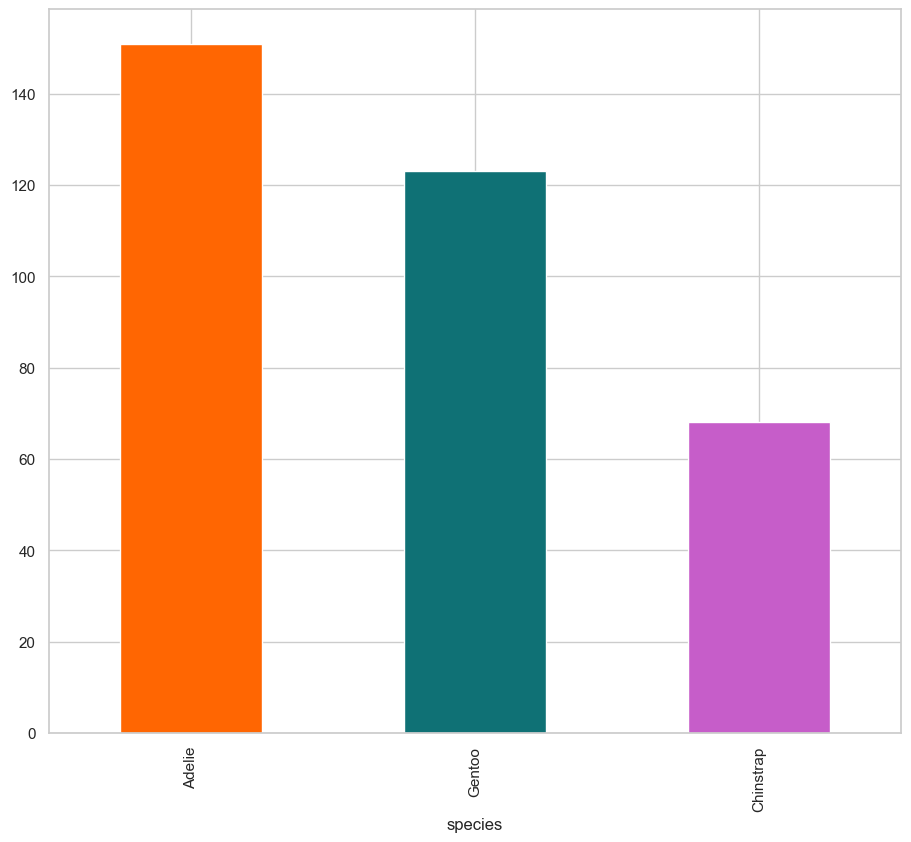

In [23]:
df_clean['species'].value_counts().plot(kind='bar', color=penguin_color.values())

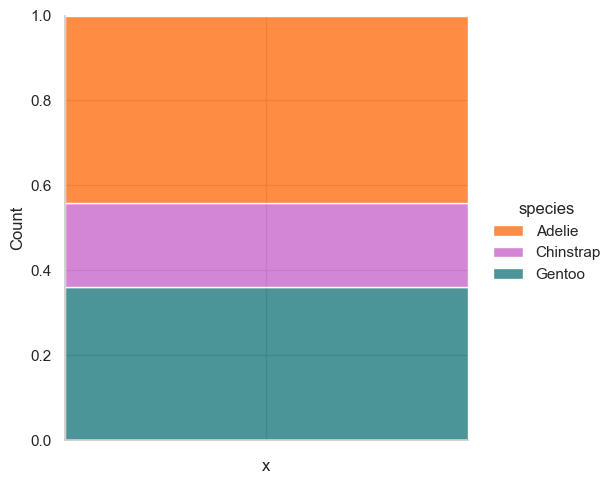

In [24]:
sns.displot(
    df_clean.assign(x=""),  # Temporary column for plotting
    x="x",
    hue="species",
    multiple="fill",
    palette=penguin_color
)

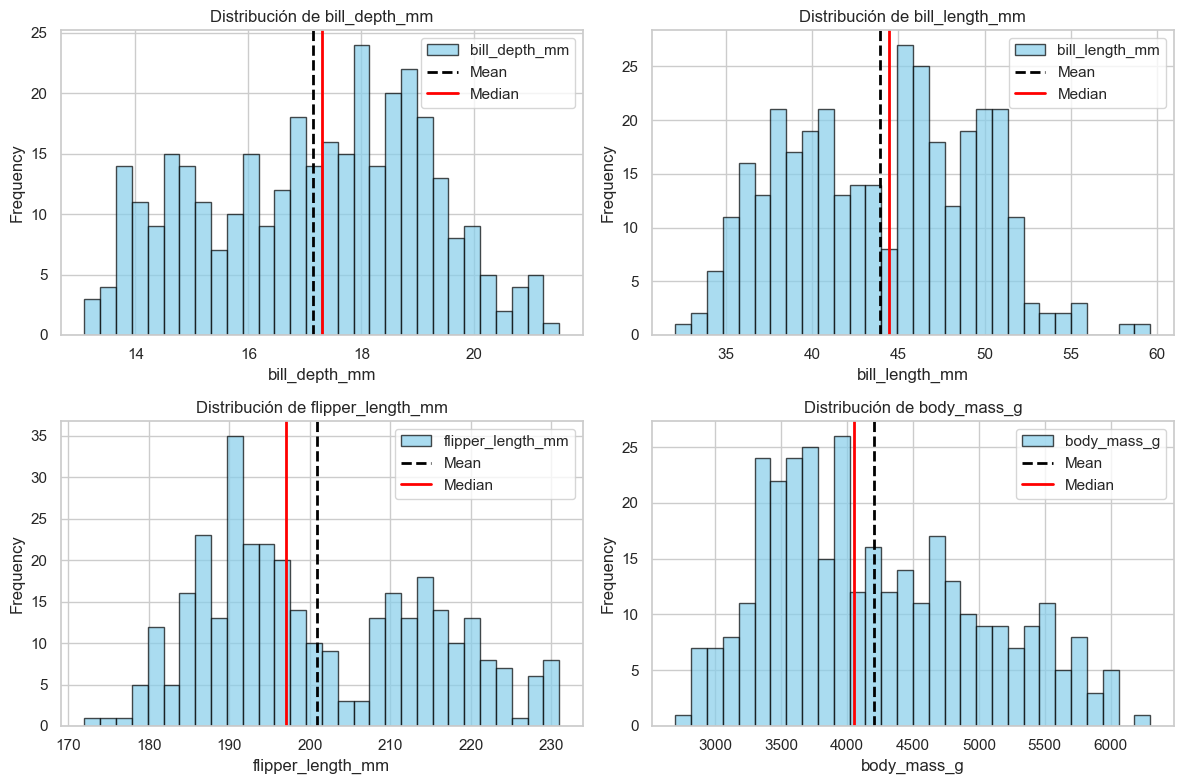

In [25]:
# Lista de variables a analizar
variables = ['bill_depth_mm', 'bill_length_mm', 'flipper_length_mm', 'body_mass_g']

# Crear subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8)) 
axes = axes.flatten()  

# Crear un histograma loopeando por cada variable
for i, var in enumerate(variables):
    ax = axes[i] 
    
    df_clean[var].plot(kind='hist', ax=ax, color='skyblue', bins=30, edgecolor='black', alpha=0.7)
    
    ax.axvline(df_clean[var].mean(), color='k', linestyle='dashed', linewidth=2, label='Mean')
    ax.axvline(df_clean[var].median(), color='r', linestyle='solid', linewidth=2, label='Median')
    
    ax.set_title(f'Distribución de {var}')
    ax.set_xlabel(var)
    ax.legend()

plt.tight_layout()
plt.show()


Vemos que tanto bill_lenght_mm como flipper_length_mm tienen lo que pareciera ser distribuciones bimodales. Mientras que body_mass_g y bill_depth_mm paracieran estar sesgadas. Lo cual nos complicaría el análisis. Pero que pasa cuando le preguntamos por las especies

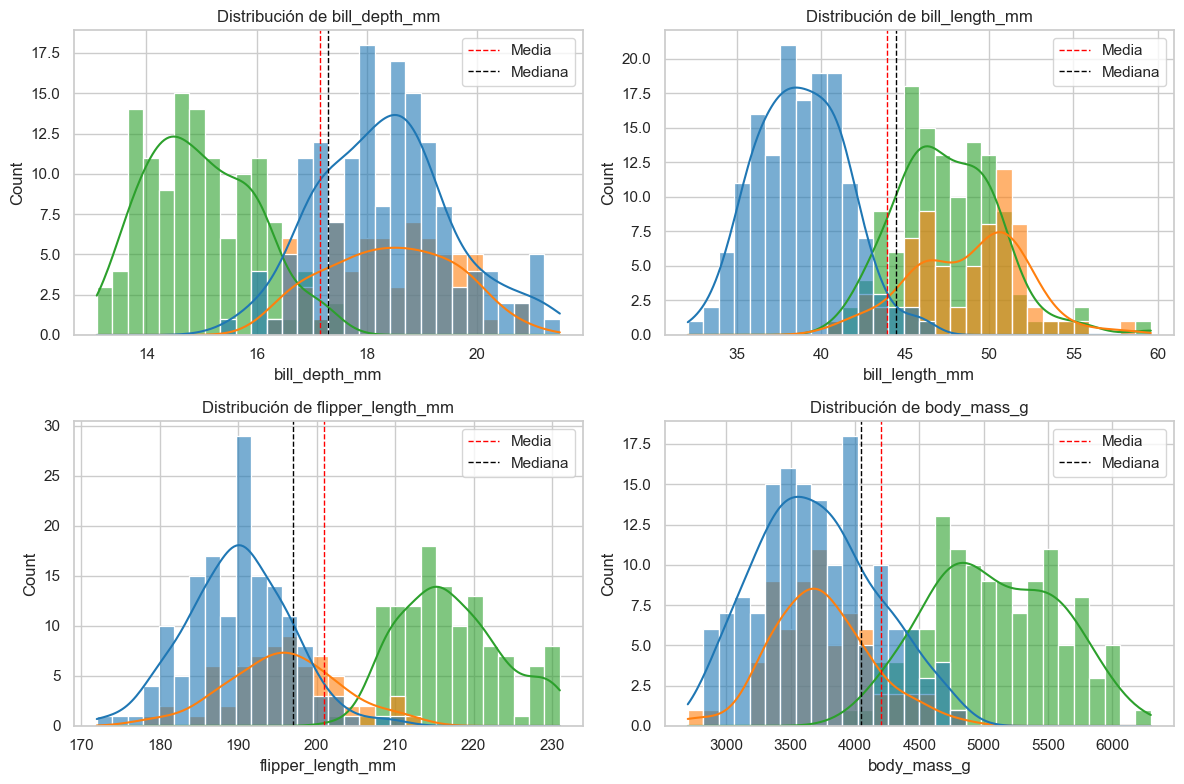

In [26]:
variables = ['bill_depth_mm', 'bill_length_mm', 'flipper_length_mm', 'body_mass_g']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axes = axes.flatten() 

for i, var in enumerate(variables):
    ax = axes[i] 
    
    sns.histplot(data=df_clean, bins=30, x=var, hue='species', kde=True, ax=ax, alpha=0.6)
    
    ax.axvline(df_clean[var].mean(), color='red', linestyle='dashed', linewidth=1, label='Media')
    ax.axvline(df_clean[var].median(), color='black', linestyle='dashed', linewidth=1, label='Mediana')
    
    ax.set_title(f'Distribución de {var}')
    ax.set_xlabel(var)
    ax.legend()

plt.tight_layout()
plt.show()


Pareciera ser que se ven más similares a una distribución normal. Lo mismo al observar relaciones entre las variables. Se ven apariciones de clusters que nos podrían indicar distintos subgrupos

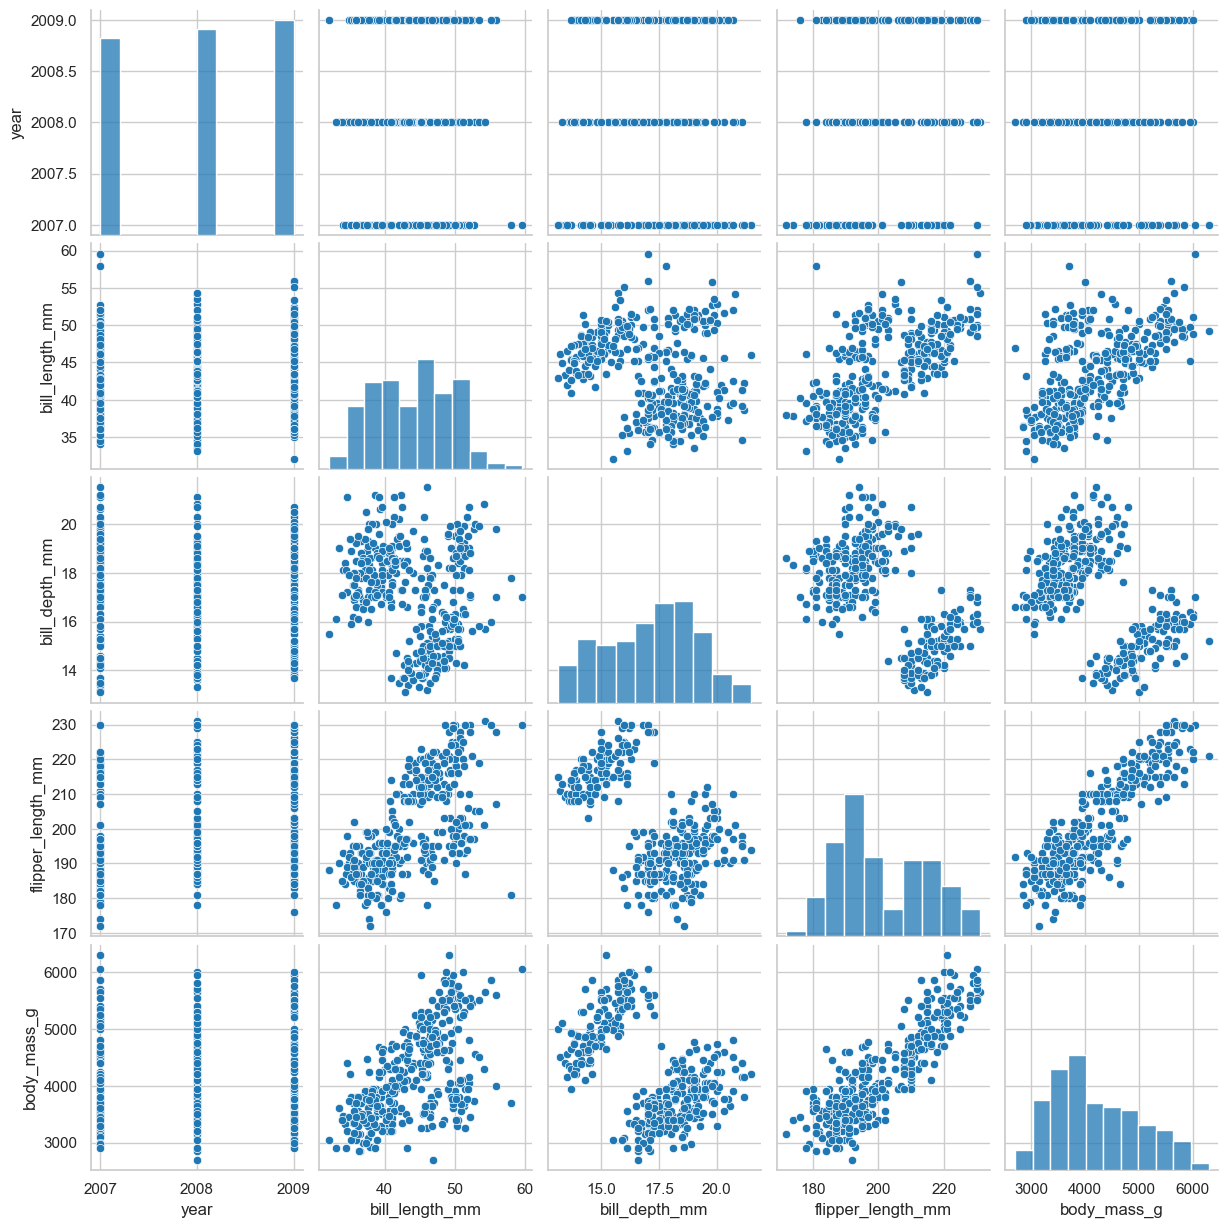

In [27]:
sns.pairplot(data=df_clean)

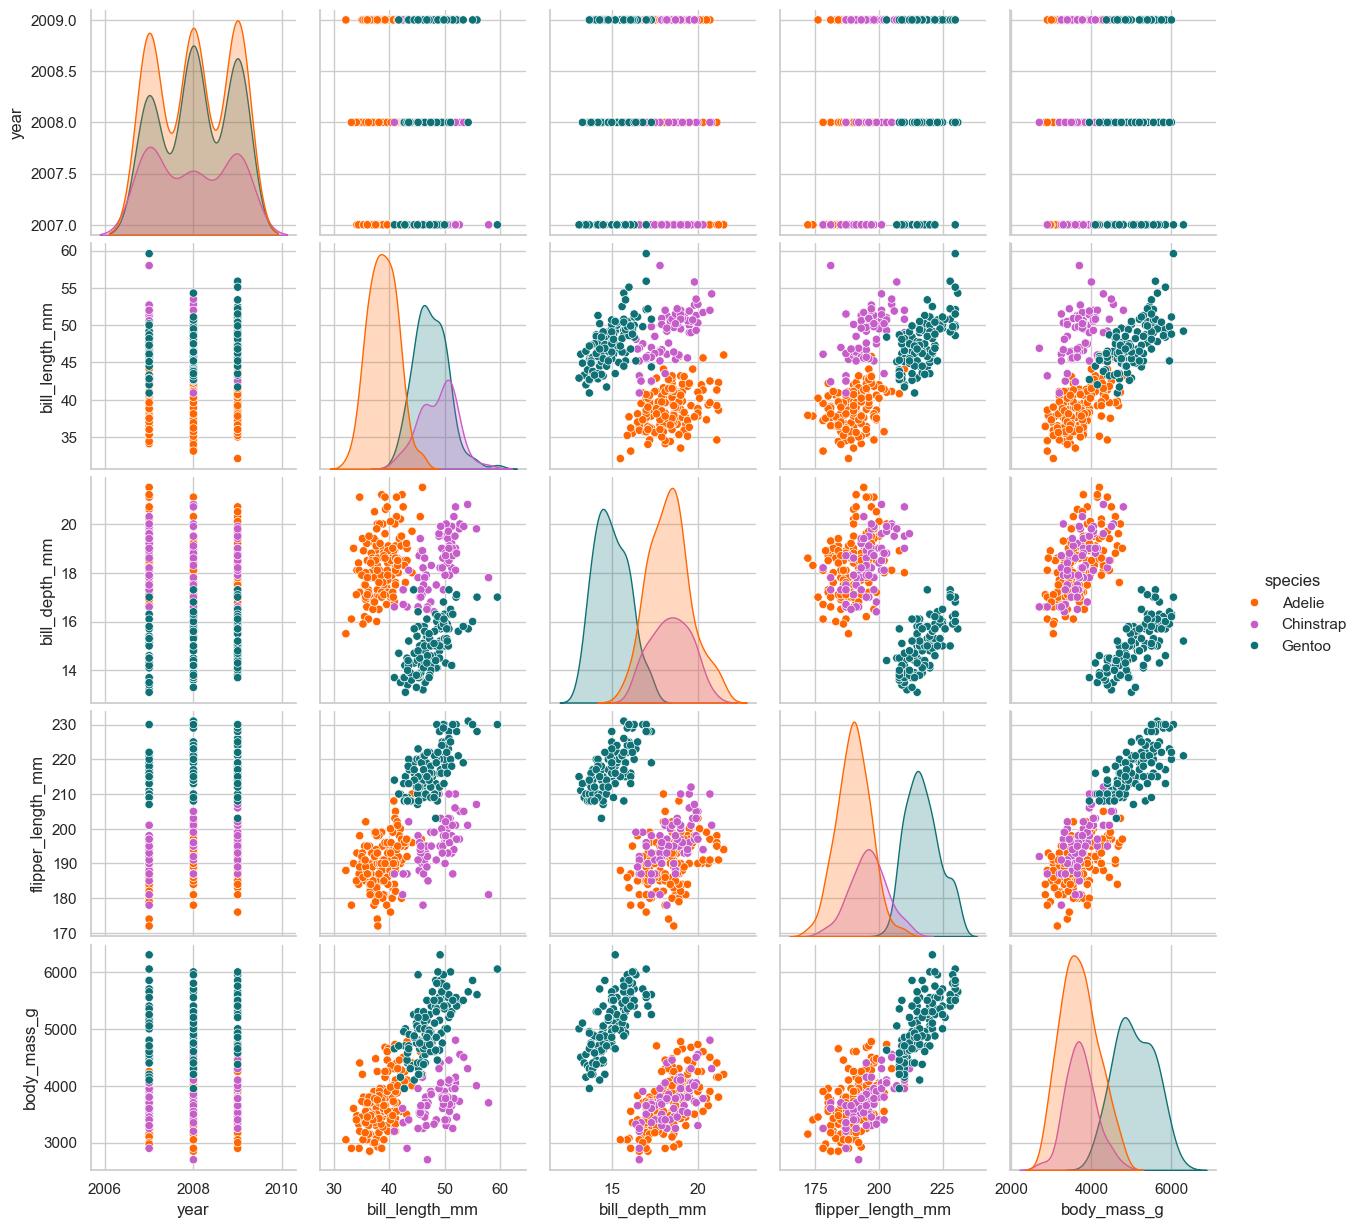

In [28]:
sns.pairplot(
    data=df_clean,
    hue='species',
    palette=penguin_color
)

Excelente! Tenemos una variable que va a poder generar distintos grupos de análisis. De todas formas inclusive hay variables que tienen alta correlación indistintamente la especie como se ve a continuación. Pero el modelo será aún más exacto para predecir valores si incluye la separación por especies.

In [29]:
df_clean

,species,island,year,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,2007,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,2007,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,2007,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,2007,36.7,19.3,193.0,3450.0,female
4,Adelie,Torgersen,2007,39.3,20.6,190.0,3650.0,male
...,...,...,...,...,...,...,...,...
337,Gentoo,Biscoe,2009,47.2,13.7,214.0,4925.0,female
338,Gentoo,Biscoe,2009,46.8,14.3,215.0,4850.0,female
339,Gentoo,Biscoe,2009,50.4,15.7,222.0,5750.0,male
340,Gentoo,Biscoe,2009,45.2,14.8,212.0,5200.0,female


<Axes: >

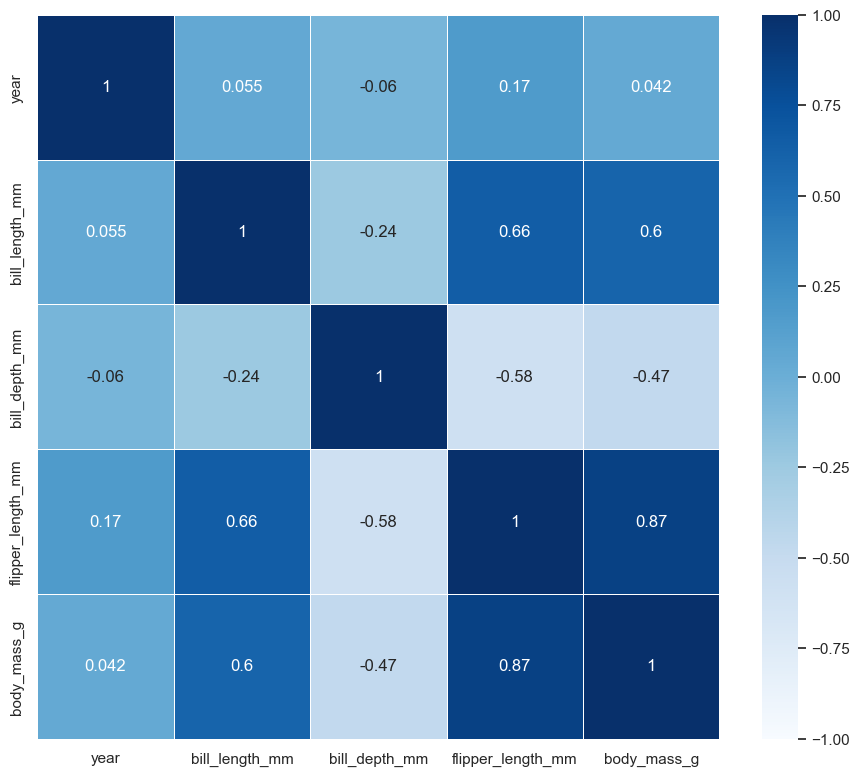

In [30]:
sns.heatmap(df_clean.corr(numeric_only=True), center=0,
    vmin=-1,
    vmax=1,
    linewidth=0.5,
    annot=True, cmap='Blues')

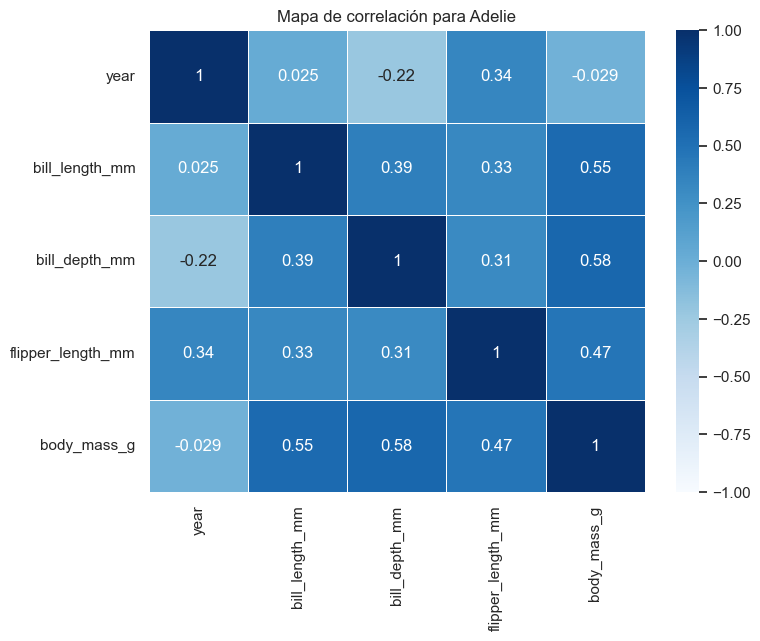

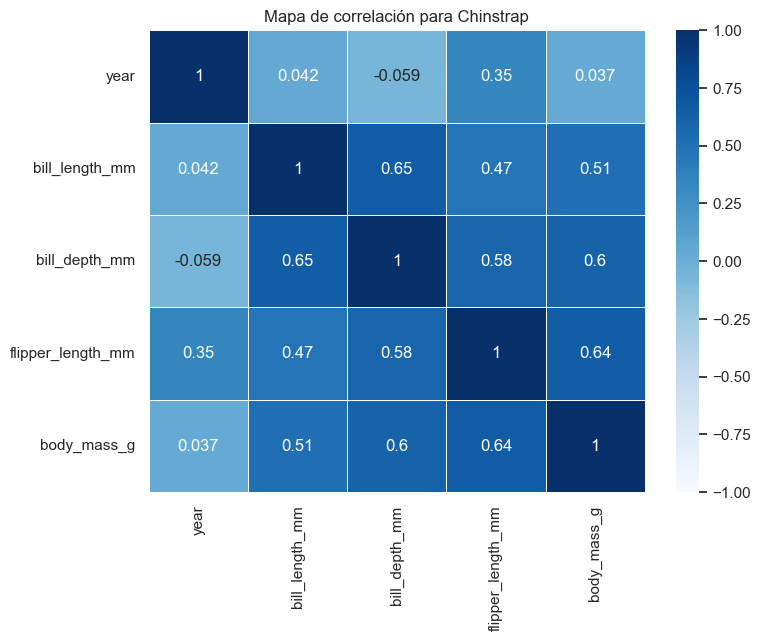

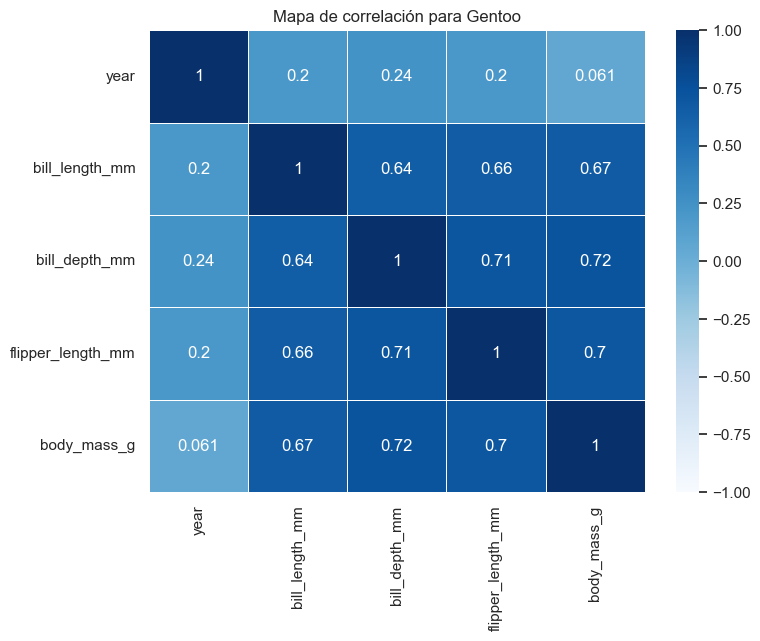

In [31]:
# Agrupar por especies
for species, group in df_clean.groupby('species'):
    # Calcular la matriz de correlación por cada especie
    corr_matrix = group.corr(numeric_only=True)

    plt.figure(figsize=(8, 6))
    sns.heatmap(
        corr_matrix,
        center=0,
        vmin=-1,
        vmax=1,
        linewidth=0.5,
        annot=True,
        cmap='Blues'
    )
    plt.title(f"Mapa de correlación para {species}")
    plt.show()


## Prediciendo el peso, ajustando múltiples variables

Arrancamos utilizando la de mayor correlación. Como vemos en el heatmap, en Adelie el flipper_length tiene menor correlación que las otras especies, y por eso el R2 Ajustado da bastante más bajo. Iremos agregando las otras variables progresivamente, y ajustando.

Es ir probando con criterio. 

In [32]:
results = []

model_formulas = {
    "model_1": "body_mass_g ~ bill_depth_mm",
    "model_2": "body_mass_g ~ flipper_length_mm + bill_depth_mm",
    "model_3": "body_mass_g ~ flipper_length_mm + bill_depth_mm + bill_length_mm",
    "model_4": "body_mass_g ~ bill_depth_mm + C(sex)",
    "model_5": "body_mass_g ~ flipper_length_mm + C(sex) + bill_depth_mm + C(island)",
}

for species, group in df_clean.groupby("species"):
    models = {
        name: smf.ols(formula=formula, data=group).fit()
        for name, formula in model_formulas.items()
    }

    predictions = {
        "species": [species] * len(group),
        "actual_value": group["body_mass_g"].values,
    }

    for name, model in models.items():
        predictions[f"{name}_predicted"] = model.predict(group).values
        predictions[f"{name}_residuals"] = model.resid.values
        predictions[f"{name}_fitted"] = model.fittedvalues.values
        predictions[f"{name}_r2_adj"] = model.rsquared_adj        

    results.append(pd.DataFrame(predictions))

predictions_df = pd.concat(results, ignore_index=True)
print(predictions_df)

    species  actual_value  model_1_predicted  model_1_residuals  \
0    Adelie        3750.0        3777.456263         -27.456263   
1    Adelie        3800.0        3495.159177         304.840823   
2    Adelie        3250.0        3625.450140        -375.450140   
3    Adelie        3450.0        3907.747225        -457.747225   
4    Adelie        3650.0        4190.044310        -540.044310   
..      ...           ...                ...                ...   
337  Gentoo        4925.0        4602.351332         322.648668   
338  Gentoo        4850.0        4824.015706          25.984294   
339  Gentoo        5750.0        5341.232577         408.767423   
340  Gentoo        5200.0        5008.736017         191.263983   
341  Gentoo        5400.0        5489.008826         -89.008826   

     model_1_fitted  model_1_r2_adj  model_2_predicted  model_2_residuals  \
0       3777.456263        0.327452        3562.496749         187.503251   
1       3495.159177        0.327452      

<Axes: ylabel='Proportion'>

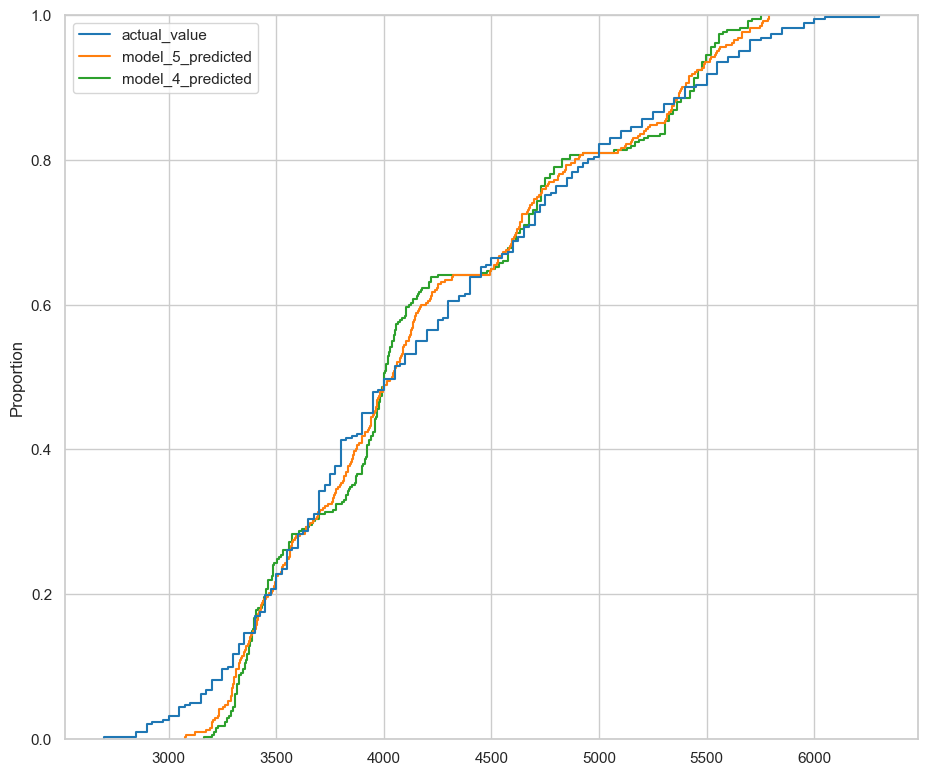

In [33]:
sns.ecdfplot(
    data=predictions_df[['actual_value','model_5_predicted','model_4_predicted']]
)

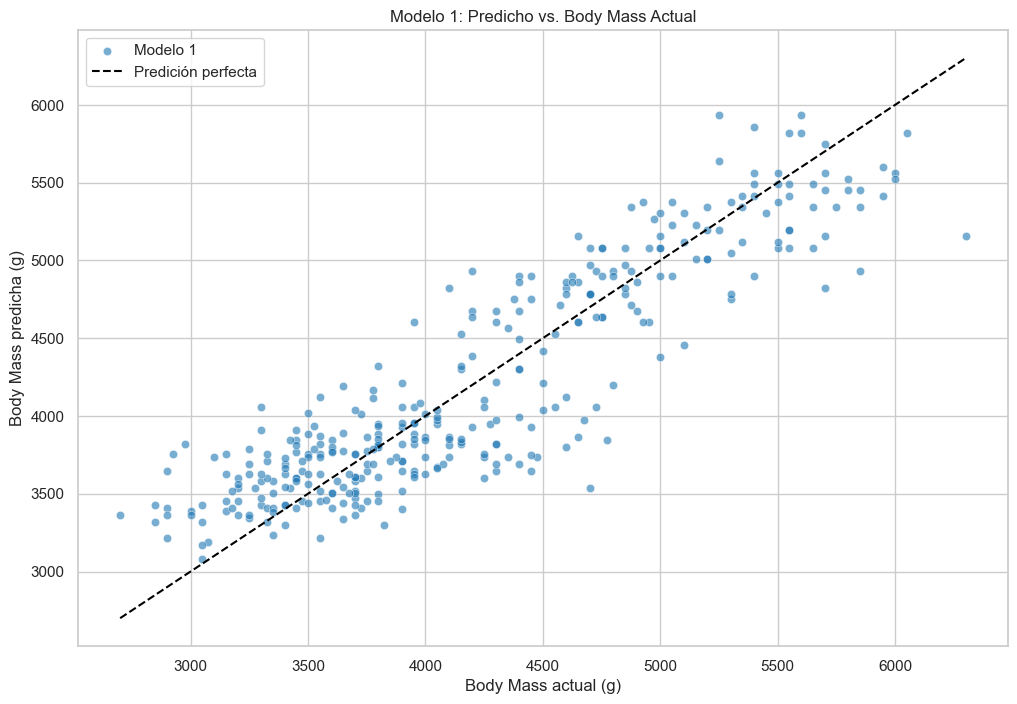

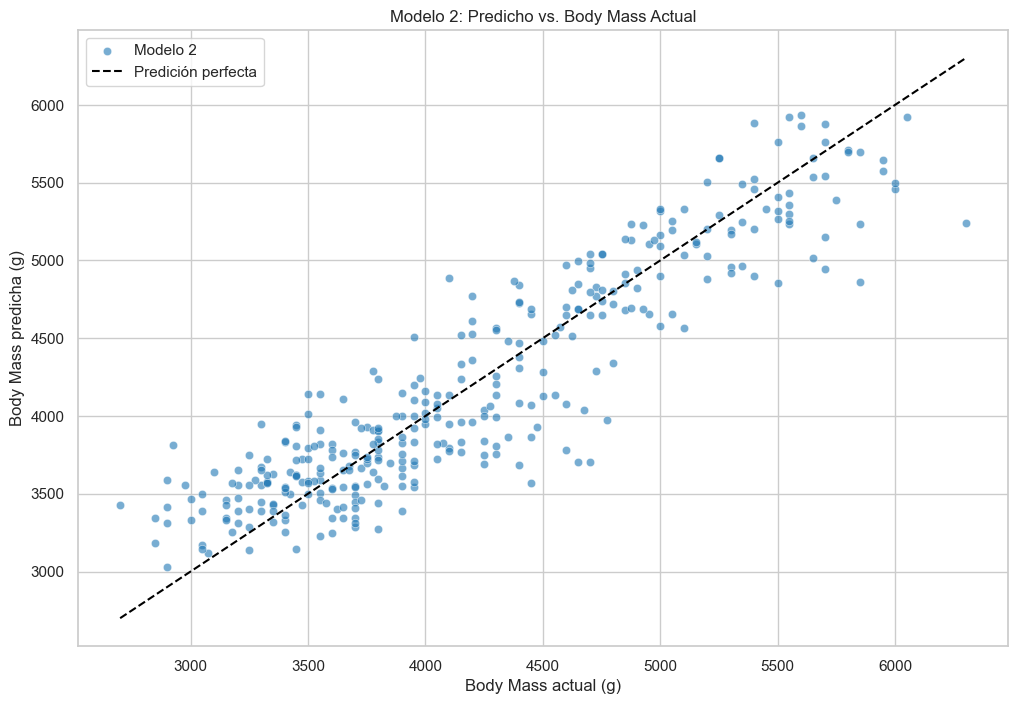

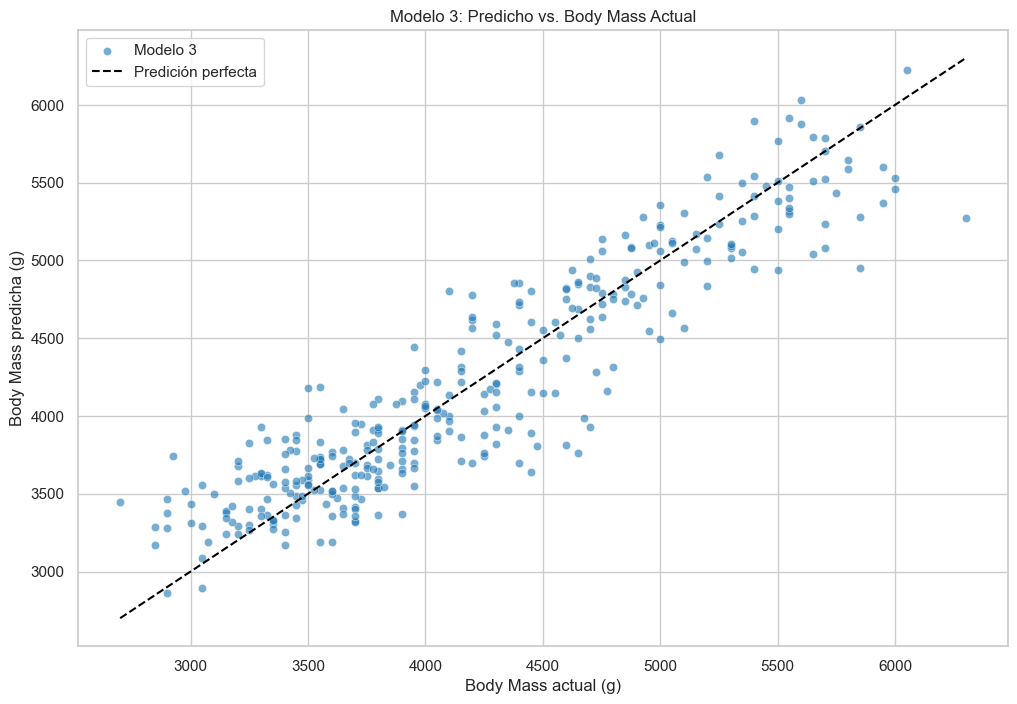

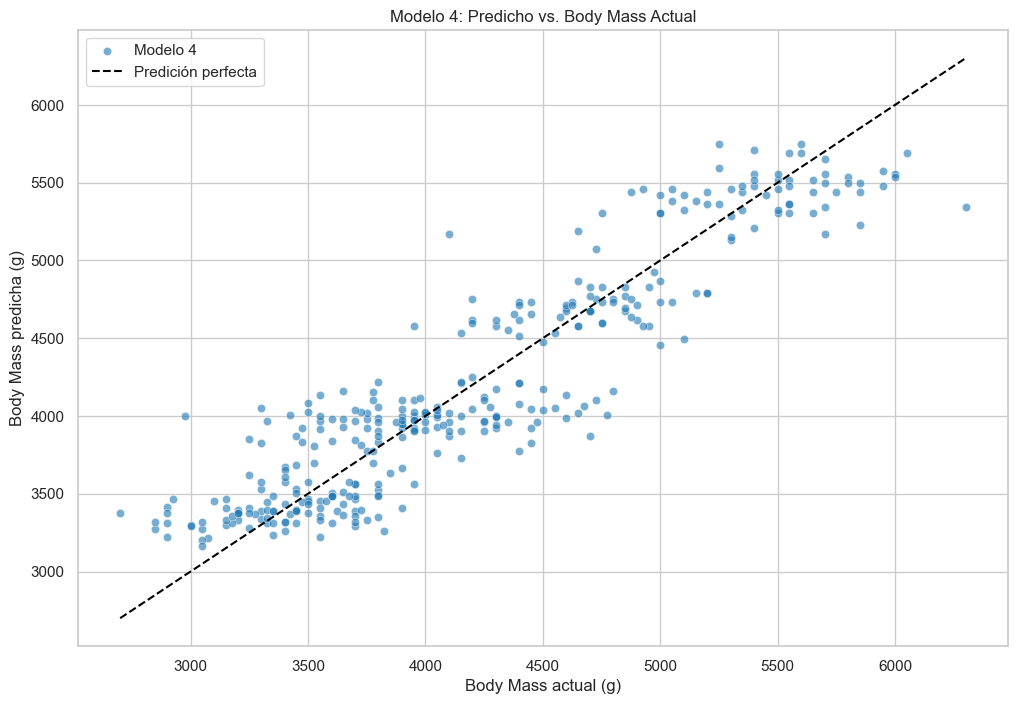

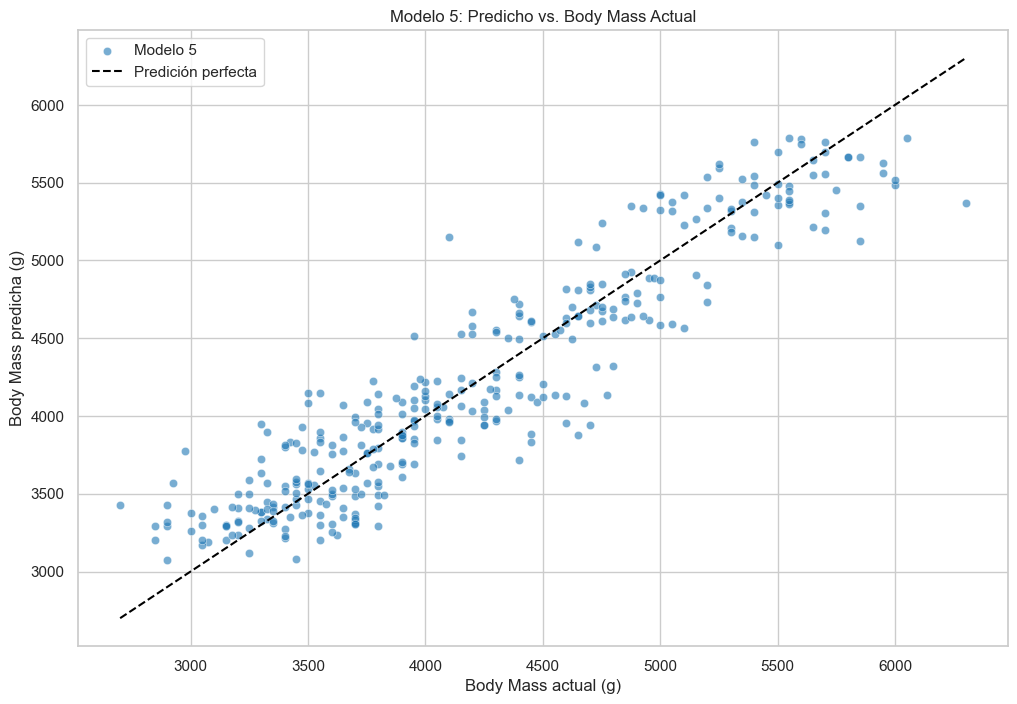

In [34]:
for i, model in enumerate(
    [
        "model_1_predicted",
        "model_2_predicted",
        "model_3_predicted",
        "model_4_predicted",
        "model_5_predicted"
    ]
):
    plt.figure(figsize=(12, 8))

    sns.scatterplot(
        x=predictions_df["actual_value"],
        y=predictions_df[model],
        label=f"Modelo {i+1}",
        alpha=0.6,
    )

    min_val = min(predictions_df["actual_value"].min(), predictions_df[model].min())
    max_val = max(predictions_df["actual_value"].max(), predictions_df[model].max())

    plt.plot(
        [min_val, max_val],
        [min_val, max_val],
        color="black",
        linestyle="--",
        label="Predición perfecta",
    )

    plt.xlabel("Body Mass actual (g)")
    plt.ylabel("Body Mass predicha (g)")
    plt.title(f"Modelo {i+1}: Predicho vs. Body Mass Actual")
    plt.legend()

    plt.show()

<Axes: ylabel='Density'>

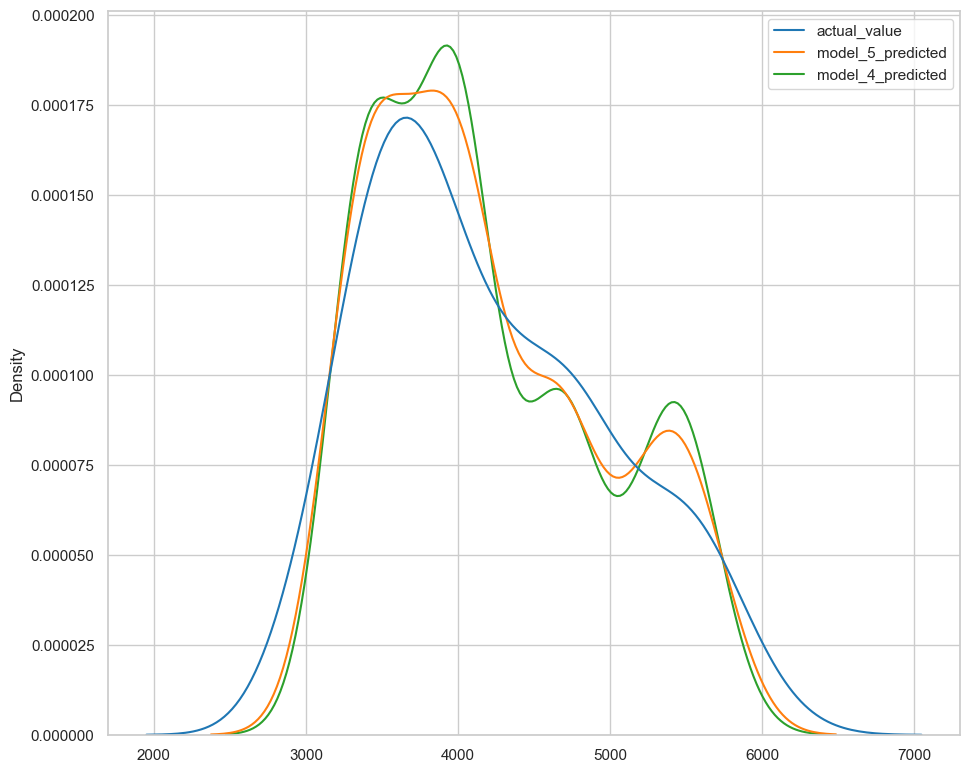

In [35]:
sns.kdeplot(
    data=predictions_df[['actual_value','model_5_predicted','model_4_predicted']]
)

En el panel de las métricas podemos ver la performance de los modelos. Sklearn solo provee de r2. Pero R2 tiene un problema y es que por como está hecha la fórmula a mayor cantidad de variables agregadas, mejor performance. Para eso incluí R2 ajustado, y a pesar de ir agregando variables, fue el que mejor performó el Modelo 5: flipper_length_mm + C(sex) + bill_depth_mm + C(island)

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


model_names = ["model_1", "model_2", "model_3", "model_4", "model_5"]
metrics_data = []

for model in model_names:
    actual = predictions_df['actual_value']
    predicted = predictions_df[f'{model}_predicted']

    mae = mean_absolute_error(actual, predicted)
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(actual, predicted)

    metrics_data.append({
        'Model': model,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R Cuadrada': r2,
        'R2 Ajustada': predictions_df[f'{model}_r2_adj'].mean()
    })

metrics_df = pd.DataFrame(metrics_data)

metrics_df.head(5)

metrics_df_sorted = metrics_df.sort_values('RMSE')
print("\Métricas ordenadas por RMSE:")
print(metrics_df_sorted)

\Métricas ordenadas por RMSE:
     Model         MAE            MSE        RMSE  R Cuadrada  R2 Ajustada
4  model_5  226.087367   83211.272789  288.463642    0.870236     0.582485
2  model_3  240.401761   93756.841144  306.197389    0.853791     0.536700
3  model_4  243.282527   94515.366814  307.433516    0.852608     0.529517
1  model_2  254.931052  104588.363300  323.401242    0.836899     0.490046
0  model_1  281.122636  123757.867024  351.792364    0.807005     0.399854


<>:30: SyntaxWarning: invalid escape sequence '\M'
<>:30: SyntaxWarning: invalid escape sequence '\M'
C:\Users\veraa\AppData\Local\Temp\ipykernel_11076\3391447759.py:30: SyntaxWarning: invalid escape sequence '\M'
  print("\Métricas ordenadas por RMSE:")


### Revisión de los residuales

Los residuales de las predicciones se asume que tienen que estar normalmente distribuidos, porque tienen que ser azarosos. Si no están random, es porque están desviados con algun sesgo. En este caso lo hacemos con el mejor modelo segun el R2 

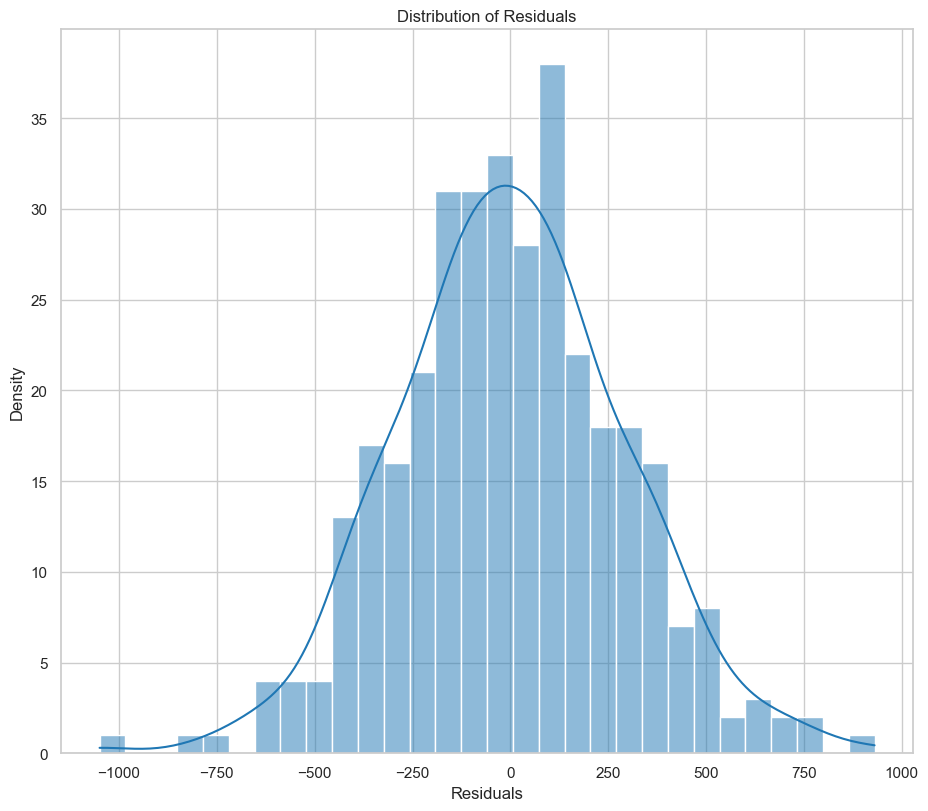

In [37]:
sns.histplot(predictions_df["model_5_residuals"], bins=30, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.title("Distribution of Residuals")
plt.show()

### Conclusiones sobre Regresión en Body Mass
Vemos que el modelo que mejor estima el peso es aquel que toma en cuenta la longitud del ala y la profundidad del pico, el sexo del pinguino y de que isla proviene. <br />
La longitud del pico, en cambio, no provee información para predecir el peso corporal. <br />
Se puede profundizar, porque en cada especie de pinguino hay información que aporta más, y otras que no. <br />
Pero como modelo general sirve para aproximar y comprender las variables

## Regresión Logística

In [38]:
df_logistico = df_clean.copy()
df_logistico.columns

Index(['species', 'island', 'year', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [39]:
print(df_logistico.head(10))
target = 'sex'
encode = ['species','island']

for col in encode:
    dummy = pd.get_dummies(df_logistico[col], prefix=col)
    df_logistico = pd.concat([df_logistico,dummy], axis=1)
    del df_logistico[col]

  species     island  year  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen  2007            39.1           18.7              181.0   
1  Adelie  Torgersen  2007            39.5           17.4              186.0   
2  Adelie  Torgersen  2007            40.3           18.0              195.0   
3  Adelie  Torgersen  2007            36.7           19.3              193.0   
4  Adelie  Torgersen  2007            39.3           20.6              190.0   
5  Adelie  Torgersen  2007            38.9           17.8              181.0   
6  Adelie  Torgersen  2007            39.2           19.6              195.0   
7  Adelie  Torgersen  2007            34.1           18.1              193.0   
8  Adelie  Torgersen  2007            42.0           20.2              190.0   
9  Adelie  Torgersen  2007            37.8           17.1              186.0   

   body_mass_g     sex  
0       3750.0    male  
1       3800.0  female  
2       3250.0  female  
3       3450.0  fem

In [40]:
print(df_logistico['sex'].unique())

['male' 'female']


In [41]:
target_mapper = {'male':0, 'female':1}
def target_encode(val):
    return target_mapper[val]

df_logistico['numeric_sex'] = df_logistico['sex'].apply(target_encode)

In [42]:
print(df_logistico.head())
#Separando X e y
X = df_logistico.drop(['sex','numeric_sex'], axis=1)
y = df_logistico['numeric_sex']

   year  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
0  2007            39.1           18.7              181.0       3750.0   
1  2007            39.5           17.4              186.0       3800.0   
2  2007            40.3           18.0              195.0       3250.0   
3  2007            36.7           19.3              193.0       3450.0   
4  2007            39.3           20.6              190.0       3650.0   

      sex  species_Adelie  species_Chinstrap  species_Gentoo  island_Biscoe  \
0    male            True              False           False          False   
1  female            True              False           False          False   
2  female            True              False           False          False   
3  female            True              False           False          False   
4    male            True              False           False          False   

   island_Dream  island_Torgersen  numeric_sex  
0         False              Tr

In [43]:
# Escalando la data
from sklearn import preprocessing
X = preprocessing.scale(X)

In [44]:
# Separando los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=13)

In [45]:
# Ajustado y predicción del modelo
model = LogisticRegression().fit(X_train, y_train)
pred = model.predict(X_test)

Matriz de confusión
[[26 10]
 [ 0 33]]


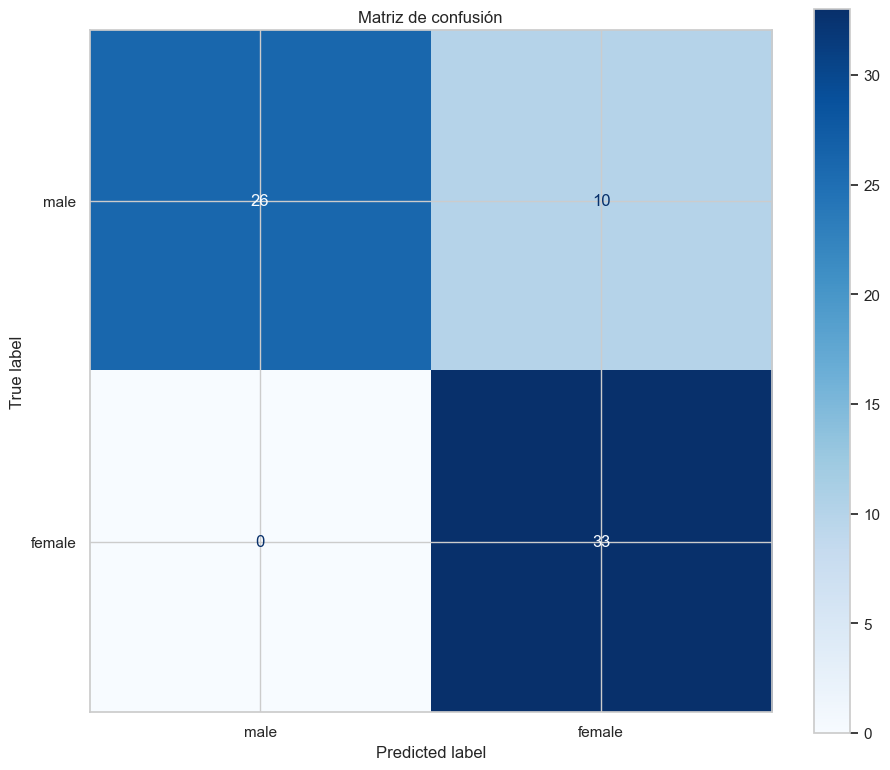

In [46]:
# Performance del modelo

print('Matriz de confusión')
print(confusion_matrix(y_test, pred))
cm = confusion_matrix(y_test, pred)
ConfusionMatrixDisplay(cm, display_labels=df_logistico['sex'].unique()).plot(cmap="Blues")
plt.title("Matriz de confusión")
plt.show()

In [47]:
print('REPORTE DE CLASIFICACIÓN\n')
print(classification_report(y_test, pred))

REPORTE DE CLASIFICACIÓN

              precision    recall  f1-score   support

           0       1.00      0.72      0.84        36
           1       0.77      1.00      0.87        33

    accuracy                           0.86        69
   macro avg       0.88      0.86      0.85        69
weighted avg       0.89      0.86      0.85        69



El modelo logro un 91% de exactitud

### Curva ROC

La curva ROC (Receiver Operating Characteristic) mide que tan bien un modelo puede distinguir entre 2 grupos, ajustando el umbral de decisión.

Utiliza 2 métricas claves:  

- Tasa de Falsos pistivos -> "Cuantos pinguinos machos fueron diagnosticados erróneamente como hembras?"

- Tasa de Verdaderos positivos (Sensibilidad) -> "Cuantos pinguinos machos fueron detectados correctamente?"

Curva ROC


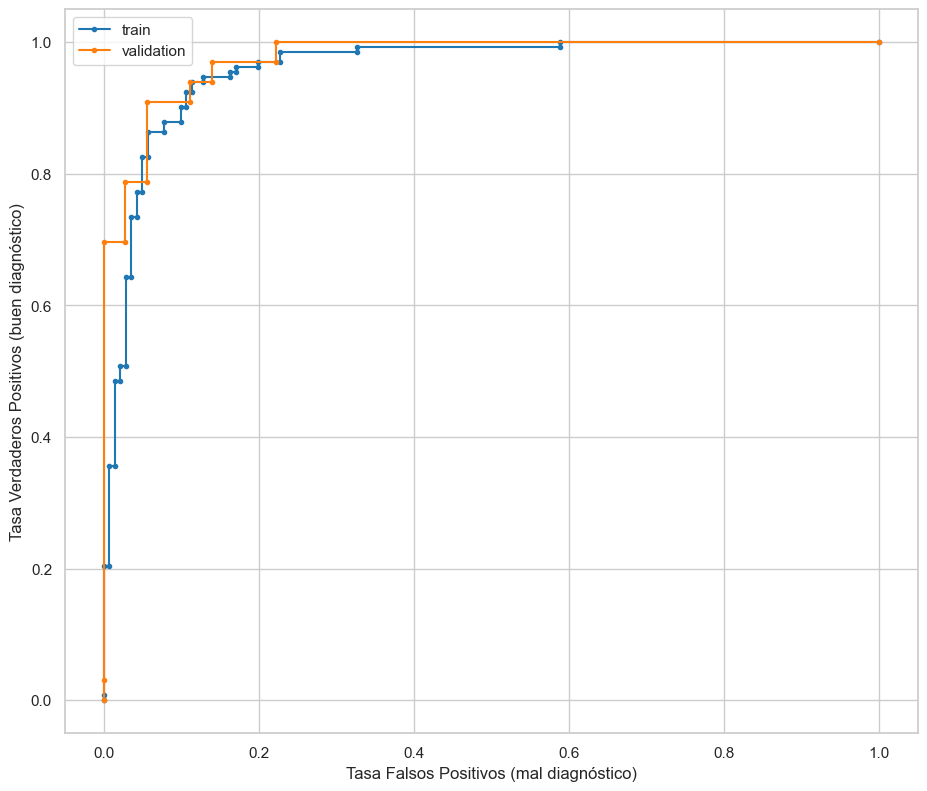

In [48]:
# ROC CURVE

print('Curva ROC')
train_probs = model.predict_proba(X_train)
train_probs1 = train_probs[:, 1]
fpr0, tpr0, thresholds0 = roc_curve(y_train, train_probs1)

test_probs = model.predict_proba(X_test)
test_probs1 = test_probs[:, 1]
fpr1, tpr1, thresholds1 = roc_curve(y_test, test_probs1)

plt.plot(fpr0, tpr0, marker='.', label='train')
plt.plot(fpr1, tpr1, marker='.', label='validation')
plt.xlabel('Tasa Falsos Positivos (mal diagnóstico)')
plt.ylabel('Tasa Verdaderos Positivos (buen diagnóstico)')
plt.legend()
plt.show()

### Conclusiones sobre Regresión Logística sobre los Sexos
Este modelo de sklearn incluye todas las otras variables en cuenta, y llega a ser bastante exacto. <br />
Tiene sentido al ser una categoría donde las variables como peso corporal, largo y profundidad del pico, como también largo de las aletas nos dan una indicación más <br /> certera de que categoría será: Si macho o hembra

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e3a23240-2678-4d10-81ca-2ea6eb0cffe6' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>